***
***
***
# Case Study: Central Asia - World Bank Data Set

Course: Python - Data Wrangling and Modeling <br>
Date: May 20, 2019
***
***

In [1]:
#Packages we need to install:
    #statsmodel = pip install -U statsmodels
    #scipy = python -m pip install --user numpy scipy matplotlib ipython jupyter pandas sympy nose

In [2]:
# import packages
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import numpy as np
import math

import statsmodels.api as sm
import pylab
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats

# import and read file
file = 'WDIW Dataset.xlsx'
data_set = pd.read_excel(file,index_col = 0)

central_asia = data_set[data_set['Cool Name'] == 'Dinobots']

central_asia


,Country Name,Hult Region,Cool Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)",...,Poverty headcount ratio at national poverty lines (% of population),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Prevalence of underweight, weight for age (% of children under 5)",Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %)
Country Code,,,,,,,,,,,,,,,,,,,,,
BGD,Bangladesh,Central Asia,Dinobots,88.000000,81.280508,99.500000,82.962,50.091697,7.728934,42.362763,...,NaN,0.1,14.7,NaN,64.142,53.476211,1.476300e+05,NaN,35.858,3.255244
BTN,Bhutan,Central Asia,Dinobots,97.700000,96.760153,99.100000,20.184,47.371469,8.731593,38.639877,...,8.2,0.3,NaN,NaN,59.833,37.152890,3.839400e+04,12.030195,40.167,3.052062
CHN,China,Central Asia,Dinobots,100.000000,99.972634,100.000000,7.635,39.435946,14.424817,25.011129,...,3.1,NaN,8.6,NaN,42.040,51.892765,9.562910e+06,NaN,57.960,2.693540
IND,India,Central Asia,Dinobots,92.618660,89.306555,99.206802,13.177,50.289637,8.991999,41.297638,...,NaN,NaN,14.5,NaN,66.400,48.451018,3.287259e+06,11.182079,33.600,2.314448
KAZ,Kazakhstan,Central Asia,Dinobots,100.000000,100.000000,100.000000,29.750,53.968577,10.988464,42.980113,...,2.5,0.2,2.5,NaN,42.664,57.424244,2.724902e+06,10.550894,57.336,1.486030
KGZ,Kyrgyzstan,Central Asia,Dinobots,100.000000,100.000000,100.000000,32.763,57.712510,6.959558,50.752952,...,25.6,0.2,7.1,NaN,63.865,49.932447,1.999500e+05,17.046285,36.135,2.463664
MDV,Maldives,Central Asia,Dinobots,99.800000,99.864962,99.700000,7.810,31.879757,4.982931,26.896827,...,NaN,NaN,10.3,NaN,60.620,67.369350,3.000000e+02,NaN,39.380,5.386972
MNG,Mongolia,Central Asia,Dinobots,85.869652,55.735523,99.815102,30.993,51.385808,6.046090,45.339719,...,NaN,0.1,13.4,NaN,31.637,42.279852,1.564120e+06,13.602846,68.363,1.957855
MMR,Myanmar,Central Asia,Dinobots,69.814837,59.919135,92.554521,28.509,47.945958,8.227360,39.718598,...,NaN,0.8,10.6,NaN,69.678,40.370732,6.765900e+05,6.017069,30.322,1.428614


In [3]:
# calculate numbers and sort the missing values in each column
df_null = central_asia.isnull().sum()
df_null[df_null > 0]

Armed forces personnel (% of total labor force)                                                             2
Births attended by skilled health staff (% of total)                                                       11
Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)                     13
Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)          12
Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)            12
Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)         12
Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)          12
Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)           12
Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)    12
Educationa

In [4]:
# calculate percentages and sort the missing values in each column
null_check = (central_asia[:].isnull().sum() / 13).round(2)
null_check [null_check > 0]

Armed forces personnel (% of total labor force)                                                            0.15
Births attended by skilled health staff (% of total)                                                       0.85
Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)                     1.00
Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)          0.92
Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)            0.92
Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)         0.92
Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)          0.92
Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)           0.92
Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative) 

In [5]:
# run correlation of each column/attribute
central_asia_corr = central_asia.copy()

central_asia_corr = central_asia_corr.corr().round(2)
print(central_asia_corr)


                                                    Access to electricity (% of population)  \
Access to electricity (% of population)                                                1.00   
Access to electricity, rural (% of rural popula...                                     0.90   
Access to electricity, urban (% of urban popula...                                     0.85   
Adolescent fertility rate (births per 1,000 wom...                                    -0.13   
Age dependency ratio (% of working-age population)                                    -0.03   
Age dependency ratio, old (% of working-age pop...                                     0.25   
Age dependency ratio, young (% of working-age p...                                    -0.11   
Agriculture, forestry, and fishing, value added...                                    -0.45   
Armed forces personnel (% of total labor force)                                       -0.24   
Birth rate, crude (per 1,000 people)              

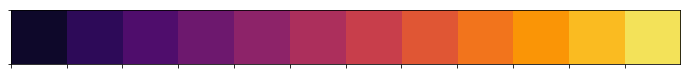

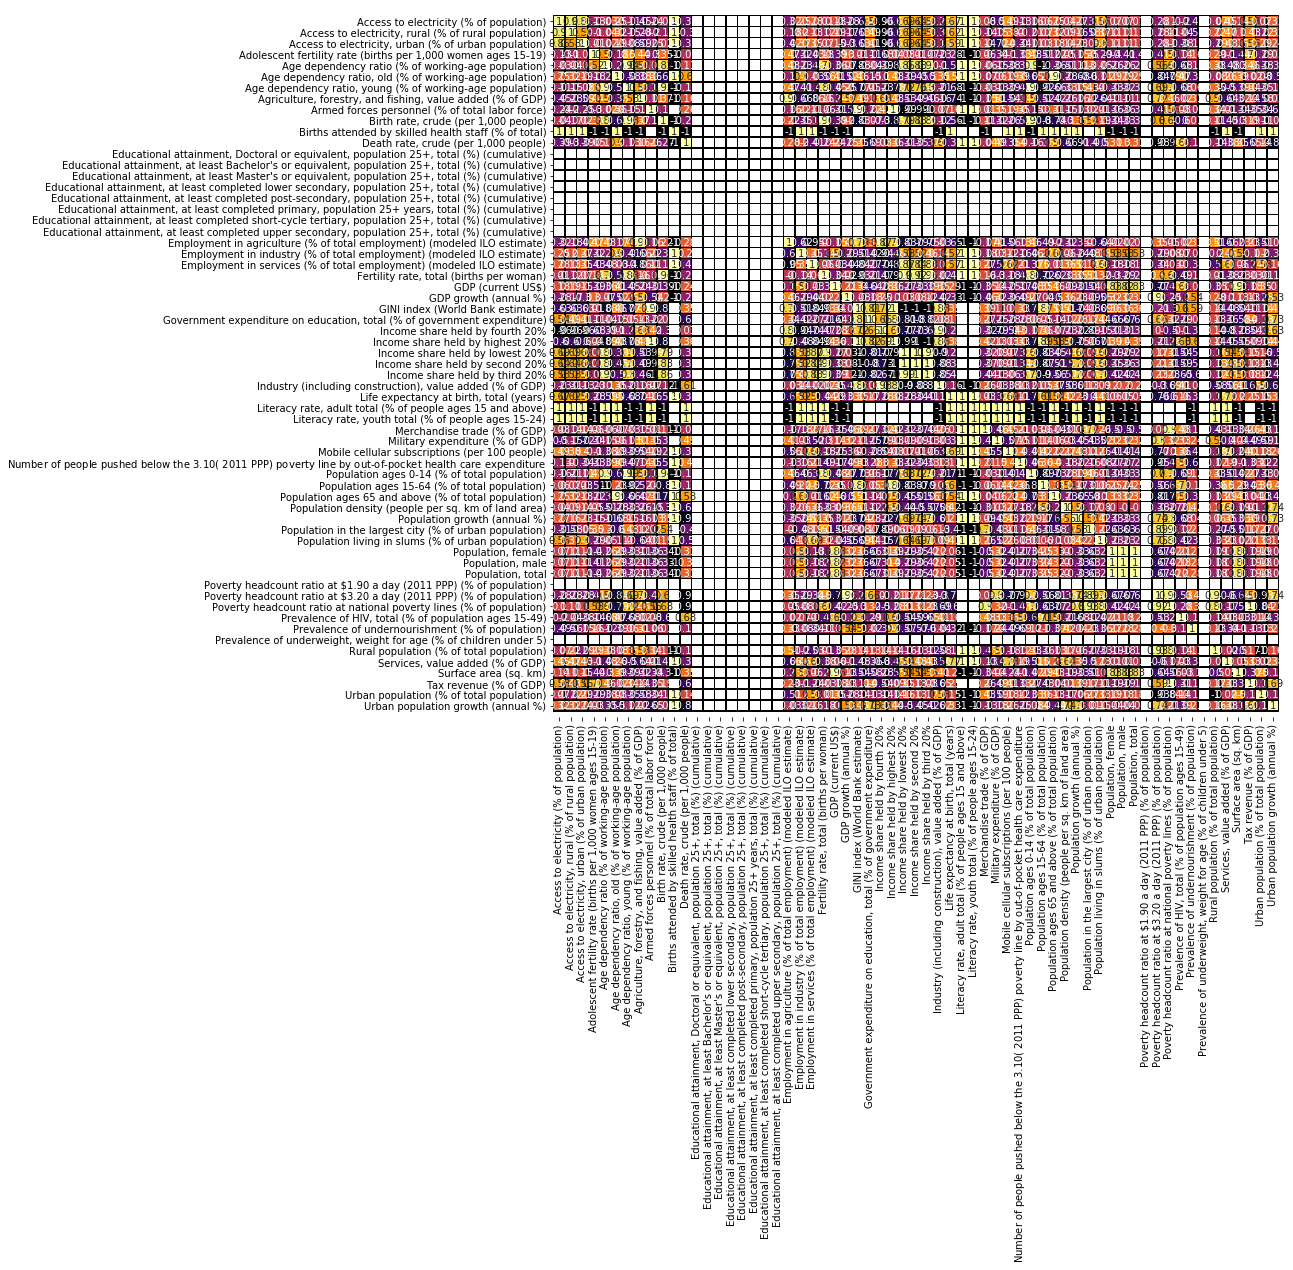

In [6]:
# Using palplot to view a color scheme
sns.palplot(sns.color_palette('inferno', 12))

# specifying plot size
fig, ax = plt.subplots(figsize=(13,13))

# creating a heatmap
sns.heatmap(central_asia_corr,
            cmap = 'inferno',
            square = False,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5,
            cbar = False)

# reconfiguring the plot
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values

# saving the figure and displaying the plot
plt.savefig('Central Asia Correlation Heatmap 2.png')
plt.show()


In [7]:
# export file
central_asia.to_excel('central_asia1.xlsx', index = False)

In [8]:
# import file 
file = 'WDIW Dataset.xlsx'
data_set = pd.read_excel(file, index_col = 0)

# sort type 'dinobots' from file, named 'central_asia1' 
central_asia1 = data_set[data_set['Cool Name'] == 'Dinobots']



In [9]:

# insert missing data in central_asia1
TAX = 'Tax revenue (% of GDP)'
POVERTY = 'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)'
EDU = 'Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)'
ARM = 'Armed forces personnel (% of total labor force)'
MIL = 'Military expenditure (% of GDP)'
POP ='Population in the largest city (% of urban population)'


MDV = 'MDV'   
MNG = 'MNG'
MMR = 'MMR'
BTN = 'BTN'
BGD = 'BGD'
CHN = 'CHN'
IND = 'IND'
KAZ = 'KAZ'
NPL = 'NPL'
LKA = 'LKA'
TJK = 'TJK'
THA = 'THA'


central_asia1.loc[MDV, ARM] = 0    #no military in the country
central_asia1.loc[BTN, ARM] = 0    #no military 

central_asia1.loc[MDV, MIL] = 0 
central_asia1.loc[MDV, POP] = 100  #no rural in maldive

central_asia1.loc[MDV, TAX] = 19.6
central_asia1.loc[CHN, TAX] = 9.201
central_asia1.loc[BGD, TAX] = 8.765
central_asia1.loc[TJK, TAX] = 9.821

central_asia1.loc[BGD, POVERTY] = 14.8
central_asia1.loc[CHN, POVERTY] = 0.7
central_asia1.loc[IND, POVERTY] = 21.2
central_asia1.loc[KAZ, POVERTY] = 0.1  
central_asia1.loc[MDV, POVERTY] = 7.3
central_asia1.loc[MNG, POVERTY] = 0.6
central_asia1.loc[MMR, POVERTY] = 6.5  
central_asia1.loc[NPL, POVERTY] = 15
central_asia1.loc[LKA, POVERTY] = 1.9
central_asia1.loc[TJK, POVERTY] = 4.8
central_asia1.loc[THA, POVERTY] = 0   # 0 for past 5 year

central_asia1.loc[BGD, EDU] = 28.969
central_asia1.loc[IND, EDU] = 26.9
central_asia1.loc[KAZ, EDU] = 85.234
central_asia1.loc[MDV, EDU] = 5.2
central_asia1.loc[MNG, EDU] = 67.6
central_asia1.loc[MMR, EDU] = 2.3
central_asia1.loc[NPL, EDU] = 16.8
central_asia1.loc[LKA, EDU] = 61.679
central_asia1.loc[TJK, EDU] = 80.6
central_asia1.loc[THA, EDU] = 32.675

# insert new columns
central_asia1 ["Income share held by highest 20%"]  = [41.4,44.4,47.9,44,37.4,37.4,45,40.6,45.7,41.5,47.6,41.7,44.1]
central_asia1 ["Income share held by lowest 20%"]    = [8.6,6.7,5.2,8.3,9.8,9.9,6.4,8,7.3,8.3,7,7.4,7.3]
central_asia1 ["Income share held by middle class"] = [50,48.9,46.9,47.7,52.8,52.7,48.6,51.4,47,50.2,45.4,50.9,48.6]
central_asia1 ["Prevalence of undernourishment (% of population)"] = [14.7,9.7,8.6,14.5,2.5,7.1,10.3,13.4,10.6,8.7,9.0,9.7,7.8]
central_asia1 ["Basic Educational Attainment (% of population)"] = [28.9,30.5,22.3,26.9,85.2,30.5,5.2,67.6,30.5,16.8,61.6,80.6,32.2]

central_asia1


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

,Country Name,Hult Region,Cool Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)",...,Prevalence of undernourishment (% of population),"Prevalence of underweight, weight for age (% of children under 5)",Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %),Income share held by middle class,Basic Educational Attainment (% of population)
Country Code,,,,,,,,,,,,,,,,,,,,,
BGD,Bangladesh,Central Asia,Dinobots,88.000000,81.280508,99.500000,82.962,50.091697,7.728934,42.362763,...,14.7,NaN,64.142,53.476211,1.476300e+05,8.765000,35.858,3.255244,50.0,28.9
BTN,Bhutan,Central Asia,Dinobots,97.700000,96.760153,99.100000,20.184,47.371469,8.731593,38.639877,...,9.7,NaN,59.833,37.152890,3.839400e+04,12.030195,40.167,3.052062,48.9,30.5
CHN,China,Central Asia,Dinobots,100.000000,99.972634,100.000000,7.635,39.435946,14.424817,25.011129,...,8.6,NaN,42.040,51.892765,9.562910e+06,9.201000,57.960,2.693540,46.9,22.3
IND,India,Central Asia,Dinobots,92.618660,89.306555,99.206802,13.177,50.289637,8.991999,41.297638,...,14.5,NaN,66.400,48.451018,3.287259e+06,11.182079,33.600,2.314448,47.7,26.9
KAZ,Kazakhstan,Central Asia,Dinobots,100.000000,100.000000,100.000000,29.750,53.968577,10.988464,42.980113,...,2.5,NaN,42.664,57.424244,2.724902e+06,10.550894,57.336,1.486030,52.8,85.2
KGZ,Kyrgyzstan,Central Asia,Dinobots,100.000000,100.000000,100.000000,32.763,57.712510,6.959558,50.752952,...,7.1,NaN,63.865,49.932447,1.999500e+05,17.046285,36.135,2.463664,52.7,30.5
MDV,Maldives,Central Asia,Dinobots,99.800000,99.864962,99.700000,7.810,31.879757,4.982931,26.896827,...,10.3,NaN,60.620,67.369350,3.000000e+02,19.600000,39.380,5.386972,48.6,5.2
MNG,Mongolia,Central Asia,Dinobots,85.869652,55.735523,99.815102,30.993,51.385808,6.046090,45.339719,...,13.4,NaN,31.637,42.279852,1.564120e+06,13.602846,68.363,1.957855,51.4,67.6
MMR,Myanmar,Central Asia,Dinobots,69.814837,59.919135,92.554521,28.509,47.945958,8.227360,39.718598,...,10.6,NaN,69.678,40.370732,6.765900e+05,6.017069,30.322,1.428614,47.0,30.5


In [10]:
# because of maldive, china, india have trenmandouse difference use median when we there is missing value of them 


mean1   = central_asia1["Government expenditure on education, total (% of government expenditure)"].mean()
mean2   = central_asia1["Prevalence of undernourishment (% of population)"].mean()
median1 = central_asia1["Military expenditure (% of GDP)"].median() #have outlier
median2 = central_asia1["Population in the largest city (% of urban population)"].median() #have huge outlier
median3 = central_asia1["Prevalence of HIV, total (% of population ages 15-49)"].median()  #have huge outlier


central_asia1["Government expenditure on education, total (% of government expenditure)"] = central_asia1["Government expenditure on education, total (% of government expenditure)"].fillna(mean1).round(2)
central_asia1["Military expenditure (% of GDP)"] = central_asia1["Military expenditure (% of GDP)"].fillna(median1).round(2)
central_asia1["Population in the largest city (% of urban population)"] = central_asia1["Population in the largest city (% of urban population)"].fillna(median2).round(2)
central_asia1["Prevalence of HIV, total (% of population ages 15-49)"] = central_asia1["Prevalence of HIV, total (% of population ages 15-49)"].fillna(median3).round(2)
central_asia1["Prevalence of undernourishment (% of population)"] = central_asia1["Prevalence of undernourishment (% of population)"].fillna(mean2).round(2)


central_asia1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,Country Name,Hult Region,Cool Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)",...,Prevalence of undernourishment (% of population),"Prevalence of underweight, weight for age (% of children under 5)",Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %),Income share held by middle class,Basic Educational Attainment (% of population)
Country Code,,,,,,,,,,,,,,,,,,,,,
BGD,Bangladesh,Central Asia,Dinobots,88.000000,81.280508,99.500000,82.962,50.091697,7.728934,42.362763,...,14.7,NaN,64.142,53.476211,1.476300e+05,8.765000,35.858,3.255244,50.0,28.9
BTN,Bhutan,Central Asia,Dinobots,97.700000,96.760153,99.100000,20.184,47.371469,8.731593,38.639877,...,9.7,NaN,59.833,37.152890,3.839400e+04,12.030195,40.167,3.052062,48.9,30.5
CHN,China,Central Asia,Dinobots,100.000000,99.972634,100.000000,7.635,39.435946,14.424817,25.011129,...,8.6,NaN,42.040,51.892765,9.562910e+06,9.201000,57.960,2.693540,46.9,22.3
IND,India,Central Asia,Dinobots,92.618660,89.306555,99.206802,13.177,50.289637,8.991999,41.297638,...,14.5,NaN,66.400,48.451018,3.287259e+06,11.182079,33.600,2.314448,47.7,26.9
KAZ,Kazakhstan,Central Asia,Dinobots,100.000000,100.000000,100.000000,29.750,53.968577,10.988464,42.980113,...,2.5,NaN,42.664,57.424244,2.724902e+06,10.550894,57.336,1.486030,52.8,85.2
KGZ,Kyrgyzstan,Central Asia,Dinobots,100.000000,100.000000,100.000000,32.763,57.712510,6.959558,50.752952,...,7.1,NaN,63.865,49.932447,1.999500e+05,17.046285,36.135,2.463664,52.7,30.5
MDV,Maldives,Central Asia,Dinobots,99.800000,99.864962,99.700000,7.810,31.879757,4.982931,26.896827,...,10.3,NaN,60.620,67.369350,3.000000e+02,19.600000,39.380,5.386972,48.6,5.2
MNG,Mongolia,Central Asia,Dinobots,85.869652,55.735523,99.815102,30.993,51.385808,6.046090,45.339719,...,13.4,NaN,31.637,42.279852,1.564120e+06,13.602846,68.363,1.957855,51.4,67.6
MMR,Myanmar,Central Asia,Dinobots,69.814837,59.919135,92.554521,28.509,47.945958,8.227360,39.718598,...,10.6,NaN,69.678,40.370732,6.765900e+05,6.017069,30.322,1.428614,47.0,30.5


In [11]:
# drop columns/attributes which are blank
central_asia1['E1'] =central_asia1["Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)"]
central_asia1['E2'] =central_asia1["Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)"]
central_asia1['E3'] =central_asia1["Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)"]
central_asia1['E4'] =central_asia1["Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)"]
central_asia1['E5'] =central_asia1["Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)"]
central_asia1['E6'] =central_asia1["Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)"]
central_asia1['E7'] =central_asia1["Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)"]
central_asia1['E8'] =central_asia1["Prevalence of underweight, weight for age (% of children under 5)"]
central_asia1['E9'] =central_asia1["Births attended by skilled health staff (% of total)"]

central_asia1.drop(['E1','E2','E3','E4','E5','E6','E7','E8','E9'], axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [12]:
# add missing values based on means as per each column
# creating a loop to improve efficiency
for col in central_asia1:
    
    if central_asia1[col].isnull().astype(float).sum() > 0:
        
        central_asia1[col] = central_asia1[col].isnull().astype(float)
        central_asia1[col] = central_asia1[col].fillna(central_asia1[col].mean()).round(2)
                

central_asia1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Country Name,Hult Region,Cool Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)",...,Prevalence of undernourishment (% of population),"Prevalence of underweight, weight for age (% of children under 5)",Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %),Income share held by middle class,Basic Educational Attainment (% of population)
Country Code,,,,,,,,,,,,,,,,,,,,,
BGD,Bangladesh,Central Asia,Dinobots,88.000000,81.280508,99.500000,82.962,50.091697,7.728934,42.362763,...,14.7,1.0,64.142,53.476211,1.476300e+05,8.765000,35.858,3.255244,50.0,28.9
BTN,Bhutan,Central Asia,Dinobots,97.700000,96.760153,99.100000,20.184,47.371469,8.731593,38.639877,...,9.7,1.0,59.833,37.152890,3.839400e+04,12.030195,40.167,3.052062,48.9,30.5
CHN,China,Central Asia,Dinobots,100.000000,99.972634,100.000000,7.635,39.435946,14.424817,25.011129,...,8.6,1.0,42.040,51.892765,9.562910e+06,9.201000,57.960,2.693540,46.9,22.3
IND,India,Central Asia,Dinobots,92.618660,89.306555,99.206802,13.177,50.289637,8.991999,41.297638,...,14.5,1.0,66.400,48.451018,3.287259e+06,11.182079,33.600,2.314448,47.7,26.9
KAZ,Kazakhstan,Central Asia,Dinobots,100.000000,100.000000,100.000000,29.750,53.968577,10.988464,42.980113,...,2.5,1.0,42.664,57.424244,2.724902e+06,10.550894,57.336,1.486030,52.8,85.2
KGZ,Kyrgyzstan,Central Asia,Dinobots,100.000000,100.000000,100.000000,32.763,57.712510,6.959558,50.752952,...,7.1,1.0,63.865,49.932447,1.999500e+05,17.046285,36.135,2.463664,52.7,30.5
MDV,Maldives,Central Asia,Dinobots,99.800000,99.864962,99.700000,7.810,31.879757,4.982931,26.896827,...,10.3,1.0,60.620,67.369350,3.000000e+02,19.600000,39.380,5.386972,48.6,5.2
MNG,Mongolia,Central Asia,Dinobots,85.869652,55.735523,99.815102,30.993,51.385808,6.046090,45.339719,...,13.4,1.0,31.637,42.279852,1.564120e+06,13.602846,68.363,1.957855,51.4,67.6
MMR,Myanmar,Central Asia,Dinobots,69.814837,59.919135,92.554521,28.509,47.945958,8.227360,39.718598,...,10.6,1.0,69.678,40.370732,6.765900e+05,6.017069,30.322,1.428614,47.0,30.5


In [13]:
# drop not-targeted columns
central_asia1 = central_asia1.dropna().round(2)
central_asia1

,Country Name,Hult Region,Cool Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)",...,Prevalence of undernourishment (% of population),"Prevalence of underweight, weight for age (% of children under 5)",Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %),Income share held by middle class,Basic Educational Attainment (% of population)
Country Code,,,,,,,,,,,,,,,,,,,,,
BGD,Bangladesh,Central Asia,Dinobots,88.00,81.28,99.50,82.96,50.09,7.73,42.36,...,14.7,1.0,64.14,53.48,147630.00,8.76,35.86,3.26,50.0,28.9
BTN,Bhutan,Central Asia,Dinobots,97.70,96.76,99.10,20.18,47.37,8.73,38.64,...,9.7,1.0,59.83,37.15,38394.00,12.03,40.17,3.05,48.9,30.5
CHN,China,Central Asia,Dinobots,100.00,99.97,100.00,7.64,39.44,14.42,25.01,...,8.6,1.0,42.04,51.89,9562910.00,9.20,57.96,2.69,46.9,22.3
IND,India,Central Asia,Dinobots,92.62,89.31,99.21,13.18,50.29,8.99,41.30,...,14.5,1.0,66.40,48.45,3287259.06,11.18,33.60,2.31,47.7,26.9
KAZ,Kazakhstan,Central Asia,Dinobots,100.00,100.00,100.00,29.75,53.97,10.99,42.98,...,2.5,1.0,42.66,57.42,2724901.88,10.55,57.34,1.49,52.8,85.2
KGZ,Kyrgyzstan,Central Asia,Dinobots,100.00,100.00,100.00,32.76,57.71,6.96,50.75,...,7.1,1.0,63.86,49.93,199950.00,17.05,36.14,2.46,52.7,30.5
MDV,Maldives,Central Asia,Dinobots,99.80,99.86,99.70,7.81,31.88,4.98,26.90,...,10.3,1.0,60.62,67.37,300.00,19.60,39.38,5.39,48.6,5.2
MNG,Mongolia,Central Asia,Dinobots,85.87,55.74,99.82,30.99,51.39,6.05,45.34,...,13.4,1.0,31.64,42.28,1564120.00,13.60,68.36,1.96,51.4,67.6
MMR,Myanmar,Central Asia,Dinobots,69.81,59.92,92.55,28.51,47.95,8.23,39.72,...,10.6,1.0,69.68,40.37,676590.00,6.02,30.32,1.43,47.0,30.5


In [14]:
central_asia1

,Country Name,Hult Region,Cool Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)",...,Prevalence of undernourishment (% of population),"Prevalence of underweight, weight for age (% of children under 5)",Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %),Income share held by middle class,Basic Educational Attainment (% of population)
Country Code,,,,,,,,,,,,,,,,,,,,,
BGD,Bangladesh,Central Asia,Dinobots,88.00,81.28,99.50,82.96,50.09,7.73,42.36,...,14.7,1.0,64.14,53.48,147630.00,8.76,35.86,3.26,50.0,28.9
BTN,Bhutan,Central Asia,Dinobots,97.70,96.76,99.10,20.18,47.37,8.73,38.64,...,9.7,1.0,59.83,37.15,38394.00,12.03,40.17,3.05,48.9,30.5
CHN,China,Central Asia,Dinobots,100.00,99.97,100.00,7.64,39.44,14.42,25.01,...,8.6,1.0,42.04,51.89,9562910.00,9.20,57.96,2.69,46.9,22.3
IND,India,Central Asia,Dinobots,92.62,89.31,99.21,13.18,50.29,8.99,41.30,...,14.5,1.0,66.40,48.45,3287259.06,11.18,33.60,2.31,47.7,26.9
KAZ,Kazakhstan,Central Asia,Dinobots,100.00,100.00,100.00,29.75,53.97,10.99,42.98,...,2.5,1.0,42.66,57.42,2724901.88,10.55,57.34,1.49,52.8,85.2
KGZ,Kyrgyzstan,Central Asia,Dinobots,100.00,100.00,100.00,32.76,57.71,6.96,50.75,...,7.1,1.0,63.86,49.93,199950.00,17.05,36.14,2.46,52.7,30.5
MDV,Maldives,Central Asia,Dinobots,99.80,99.86,99.70,7.81,31.88,4.98,26.90,...,10.3,1.0,60.62,67.37,300.00,19.60,39.38,5.39,48.6,5.2
MNG,Mongolia,Central Asia,Dinobots,85.87,55.74,99.82,30.99,51.39,6.05,45.34,...,13.4,1.0,31.64,42.28,1564120.00,13.60,68.36,1.96,51.4,67.6
MMR,Myanmar,Central Asia,Dinobots,69.81,59.92,92.55,28.51,47.95,8.23,39.72,...,10.6,1.0,69.68,40.37,676590.00,6.02,30.32,1.43,47.0,30.5


In [15]:
central_asia1.to_excel('central_asia1.xlsx', index = True)
#central_asia2 = pd.read_excel('central_asia1.xlsx')

In [19]:
# sort only columns needed for analysis
central_asia2 = central_asia1.iloc[:,[0,1,2,4,5,10,11,23,24,25,27,28,32,33,36,41,53,54,58,60,61,62,63,64,65,66,67]]

"""
4 = 'Access to electricity, rural (% of rural population)'
5 = 'Access to electricity, urban (% of urban population)',
10 = 'Agriculture, forestry, and fishing, value added (% of GDP)',
61 = 'Services, value added (% of GDP)',
23 = 'Employment in agriculture (% of total employment) (modeled ILO estimate)',
25 = 'Employment in services (% of total employment) (modeled ILO estimate)',
24 = 'Employment in industry (% of total employment) (modeled ILO estimate)',
27 = 'GDP (current US$)',
28 = 'GDP growth (annual %)',
36 = 'Industry (including construction), value added (% of GDP)',
60 = 'Rural population (% of total population)',
62 = 'Surface area (sq. km)',
53 = "Population, total",
64 = 'Urban population (% of total population)',
65 = 'Urban population growth (annual %)',
63 = "Tax revenue (% of GDP)",
54 = "Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)",
11 = "Armed forces personnel (% of total labor force)",
41 = "Military expenditure (% of GDP)",
32 = "Income share held by highest 20%",
33 = "Income share held by lowest 20%",
66 = "Income share held by middle class"
58 = "Prevalence of undernourishment (% of population)"
67 = "Basic Educational Attainment (% of population)"

"""


central_asia2


,Country Name,Hult Region,Cool Name,"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Agriculture, forestry, and fishing, value added (% of GDP)",Armed forces personnel (% of total labor force),Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),...,Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),Prevalence of undernourishment (% of population),Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %),Income share held by middle class,Basic Educational Attainment (% of population)
Country Code,,,,,,,,,,,,,,,,,,,,,
BGD,Bangladesh,Central Asia,Dinobots,81.28,99.50,13.41,0.33,40.60,20.42,38.98,...,14.8,14.7,64.14,53.48,147630.00,8.76,35.86,3.26,50.0,28.9
BTN,Bhutan,Central Asia,Dinobots,96.76,99.10,17.37,0.00,57.21,9.76,33.04,...,1.5,9.7,59.83,37.15,38394.00,12.03,40.17,3.05,48.9,30.5
CHN,China,Central Asia,Dinobots,99.97,100.00,7.57,0.34,26.98,28.98,44.04,...,0.7,8.6,42.04,51.89,9562910.00,9.20,57.96,2.69,46.9,22.3
IND,India,Central Asia,Dinobots,89.31,99.21,15.62,0.60,44.52,24.47,31.00,...,21.2,14.5,66.40,48.45,3287259.06,11.18,33.60,2.31,47.7,26.9
KAZ,Kazakhstan,Central Asia,Dinobots,100.00,100.00,4.36,0.77,15.13,21.28,63.59,...,0.1,2.5,42.66,57.42,2724901.88,10.55,57.34,1.49,52.8,85.2
KGZ,Kyrgyzstan,Central Asia,Dinobots,100.00,100.00,12.51,0.81,26.65,22.13,51.22,...,1.5,7.1,63.86,49.93,199950.00,17.05,36.14,2.46,52.7,30.5
MDV,Maldives,Central Asia,Dinobots,99.86,99.70,5.63,0.00,9.11,18.67,72.22,...,7.3,10.3,60.62,67.37,300.00,19.60,39.38,5.39,48.6,5.2
MNG,Mongolia,Central Asia,Dinobots,55.74,99.82,10.35,1.38,28.78,19.22,52.00,...,0.6,13.4,31.64,42.28,1564120.00,13.60,68.36,1.96,51.4,67.6
MMR,Myanmar,Central Asia,Dinobots,59.92,92.55,23.33,2.11,50.58,15.94,33.47,...,6.5,10.6,69.68,40.37,676590.00,6.02,30.32,1.43,47.0,30.5


In [26]:
# verify missing data before analysis
central_asia2.isnull().sum()

Country Name                                                                0
Hult Region                                                                 0
Cool Name                                                                   0
Access to electricity, rural (% of rural population)                        0
Access to electricity, urban (% of urban population)                        0
Agriculture, forestry, and fishing, value added (% of GDP)                  0
Armed forces personnel (% of total labor force)                             0
Employment in agriculture (% of total employment) (modeled ILO estimate)    0
Employment in industry (% of total employment) (modeled ILO estimate)       0
Employment in services (% of total employment) (modeled ILO estimate)       0
GDP (current US$)                                                           0
GDP growth (annual %)                                                       0
Income share held by highest 20%                                

In [27]:
# run correlation to see relationship among all observations
central_asia2_corr = central_asia2.copy()

central_asia2_corr = central_asia2_corr.corr().round(2)
print(central_asia2_corr)


                                                    Access to electricity, rural (% of rural population)  \
Access to electricity, rural (% of rural popula...                                               1.00      
Access to electricity, urban (% of urban popula...                                               0.58      
Agriculture, forestry, and fishing, value added...                                              -0.28      
Armed forces personnel (% of total labor force)                                                 -0.28      
Employment in agriculture (% of total employmen...                                              -0.18      
Employment in industry (% of total employment) ...                                               0.20      
Employment in services (% of total employment) ...                                               0.13      
GDP (current US$)                                                                                0.19      
GDP growth (annual %)       

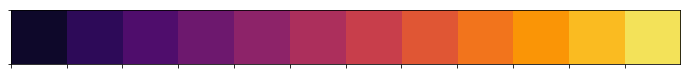

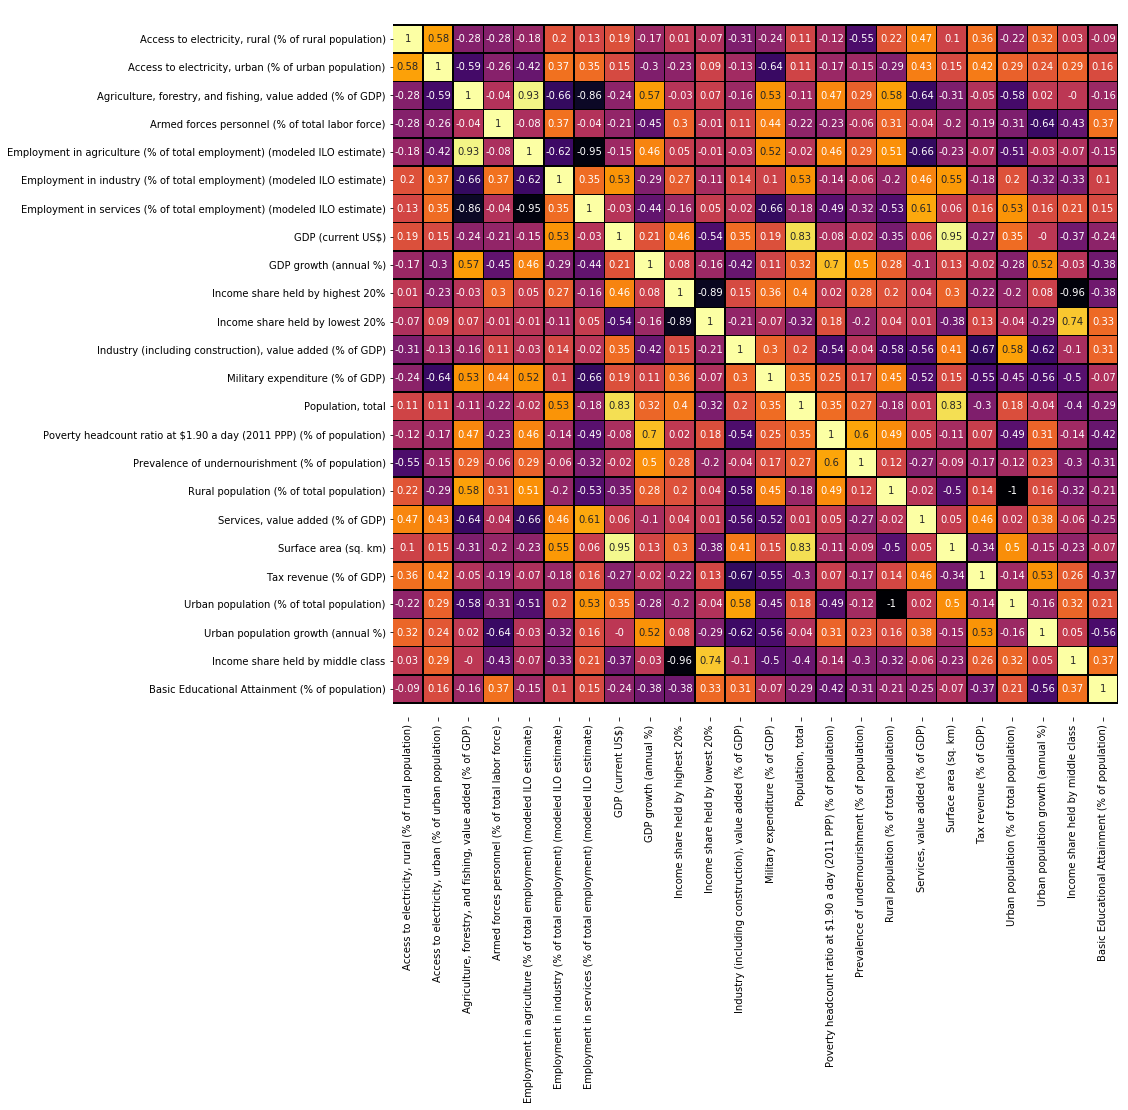

<Figure size 432x288 with 0 Axes>

In [28]:
# Using palplot to view a color scheme
sns.palplot(sns.color_palette('inferno', 12))

# specifying plot size
fig, ax = plt.subplots(figsize=(13,13))

# creating a heatmap
sns.heatmap(central_asia2_corr,
            cmap = 'inferno',
            square = False,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5,
            cbar = False)

# reconfiguring the plot
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values

# saving the figure and displaying the plot
plt.savefig('Diamond Correlation Heatmap 2.png')
plt.show()

plt.savefig('Subset Correlation.png')

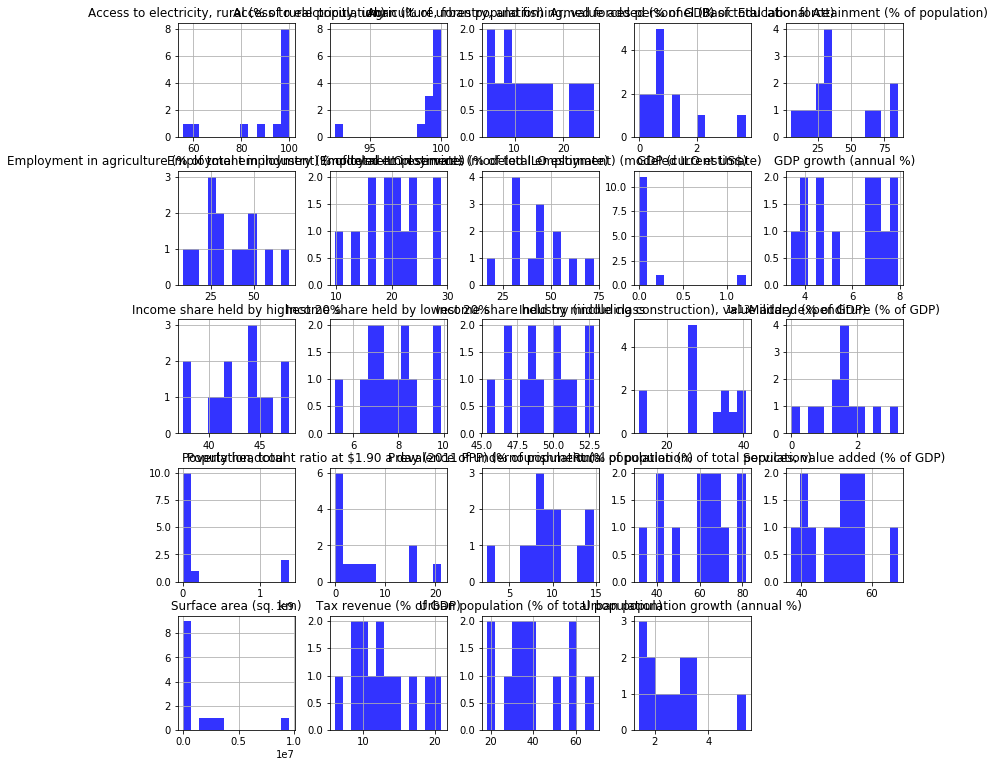

In [29]:
# plot all attributes with grouped histograms
central_asia2.loc[:].hist(bins = 13, 
                  grid = True,
                  color = 'blue',
                  figsize = (13,13),
                  alpha = 0.8)
plt.savefig('All histogram.png')

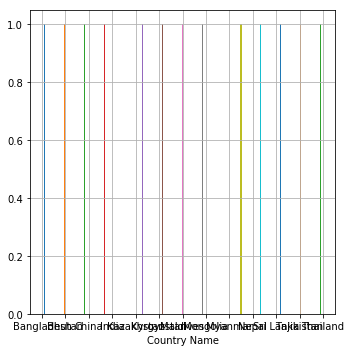

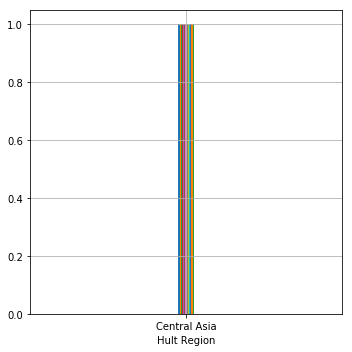

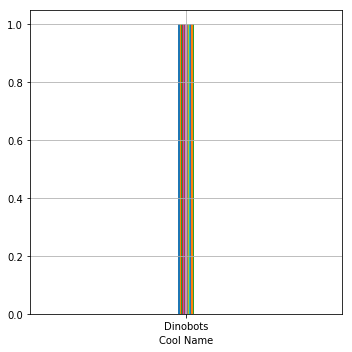

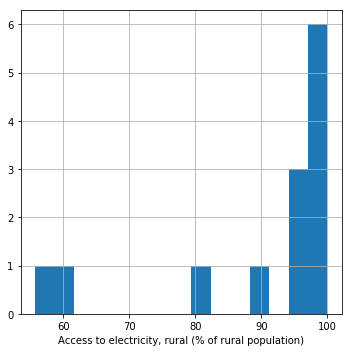

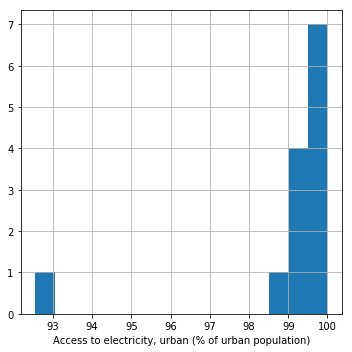

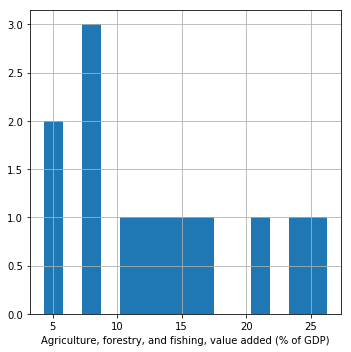

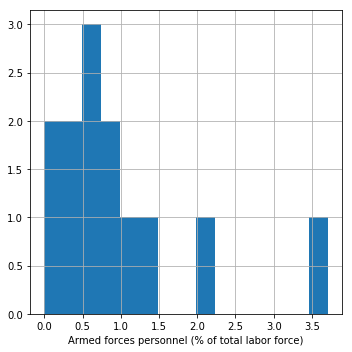

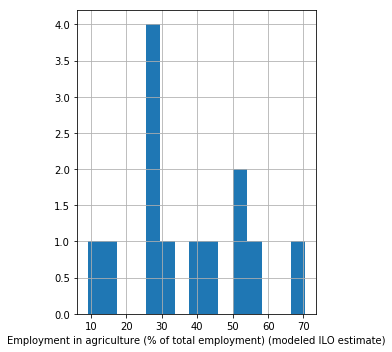

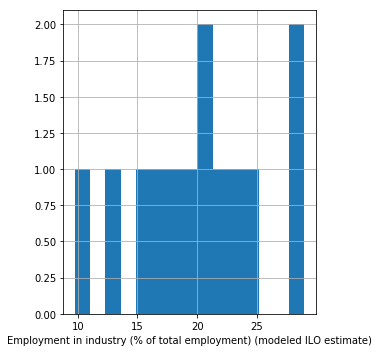

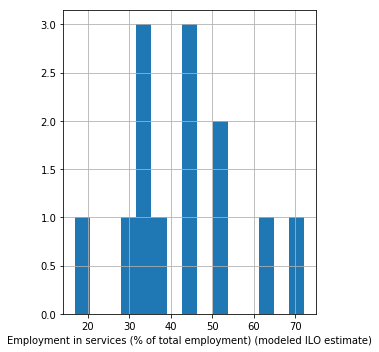

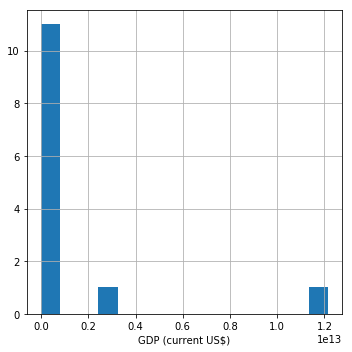

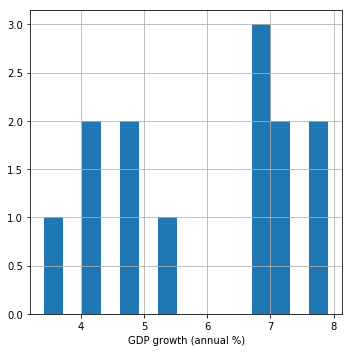

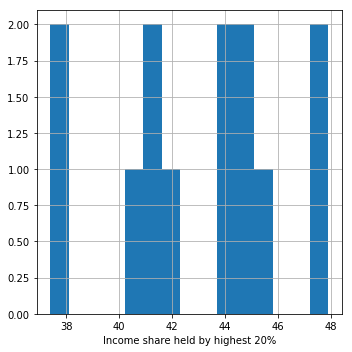

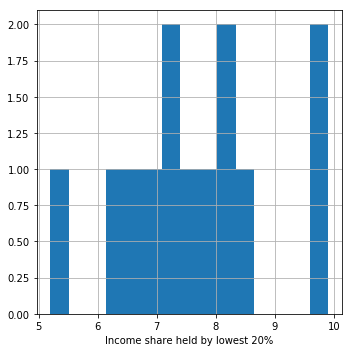

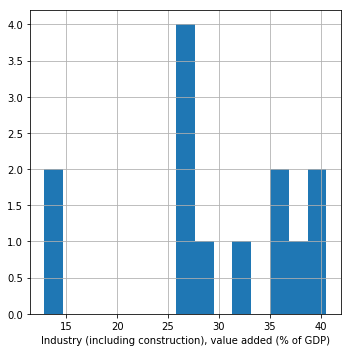

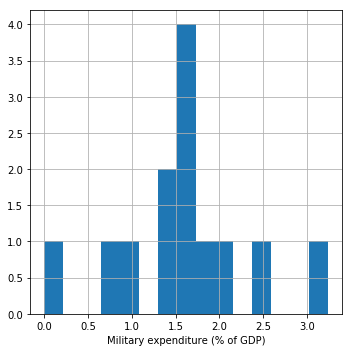

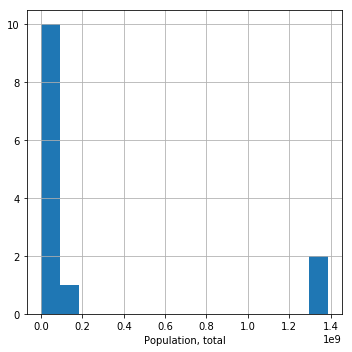

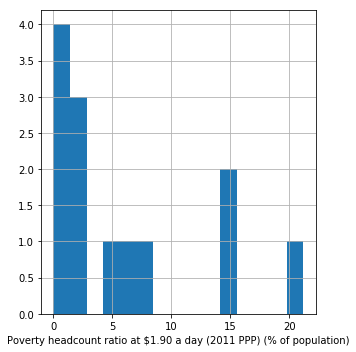

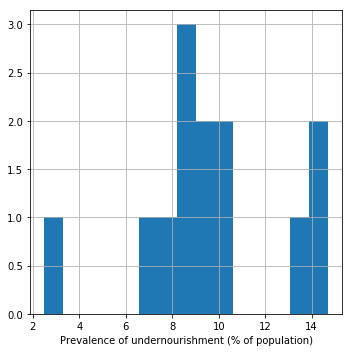

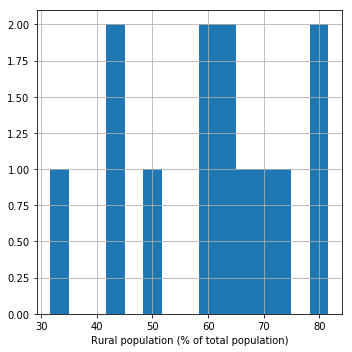

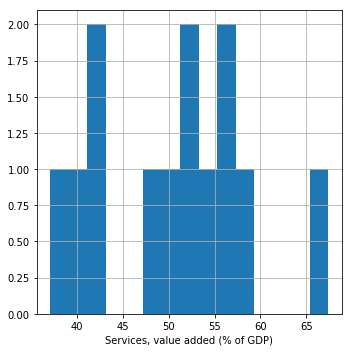

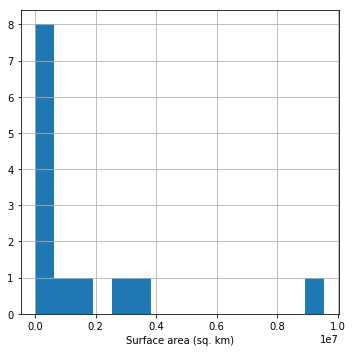

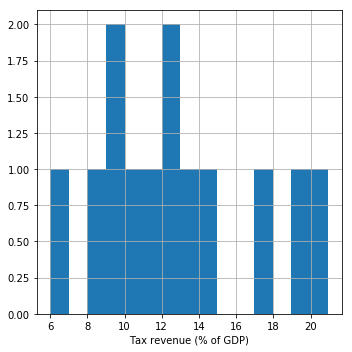

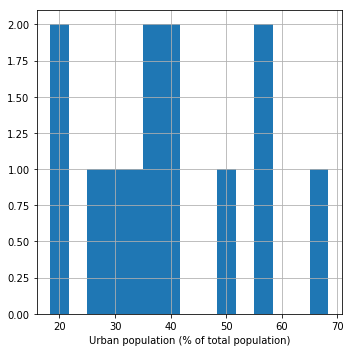

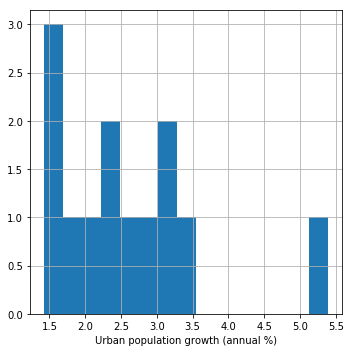

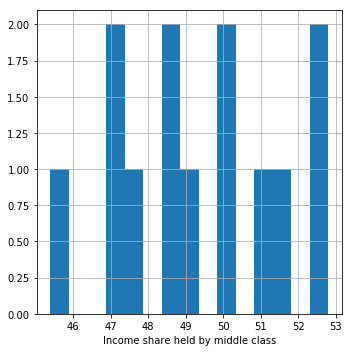

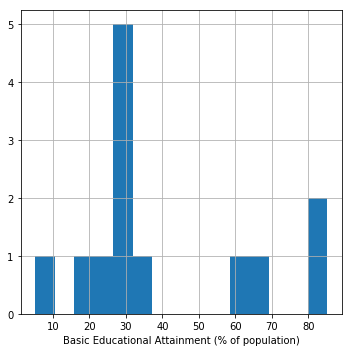

In [30]:
# plot all attributes with histograms 
for col in central_asia2[:]:
    #if type (col) != str:
    central_asia2.loc[:,col].hist(bins =15, figsize = (5,5))
    plt.xlabel (col)
    plt.tight_layout()
    plt.show()

In [31]:
# check mean & standard deviation of the attributes
central_asia2.describe().round(2)

,"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Agriculture, forestry, and fishing, value added (% of GDP)",Armed forces personnel (% of total labor force),Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),GDP (current US$),GDP growth (annual %),Income share held by highest 20%,...,Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),Prevalence of undernourishment (% of population),Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %),Income share held by middle class,Basic Educational Attainment (% of population)
count,13.00,13.00,13.00,13.00,13.00,13.00,13.00,1.300000e+01,13.00,13.00,...,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00
mean,90.30,99.06,13.36,0.97,36.79,20.17,43.04,1.221326e+12,5.89,42.98,...,5.84,9.74,60.54,50.27,1466872.69,12.77,39.46,2.60,49.32,39.91
std,15.42,2.00,7.00,1.00,17.49,5.61,14.70,3.359295e+12,1.56,3.36,...,6.94,3.26,15.11,8.37,2661216.05,4.36,15.11,1.08,2.27,25.18
min,55.74,92.55,4.36,0.00,9.11,9.76,16.83,2.528008e+09,3.42,37.40,...,0.00,2.50,31.64,37.15,300.00,6.02,18.38,1.43,45.40,5.20
25%,89.31,99.20,7.78,0.34,26.65,16.64,33.04,7.702935e+09,4.63,41.40,...,0.70,8.60,50.80,42.28,141380.00,9.82,30.32,1.89,47.70,26.90
50%,96.99,99.70,12.51,0.71,30.92,20.42,44.04,6.671908e+10,6.76,44.00,...,1.90,9.70,63.86,51.60,199950.00,12.03,36.14,2.46,48.90,30.50
75%,99.97,100.00,17.37,1.17,50.58,23.61,51.22,2.497239e+11,7.17,45.00,...,7.30,10.60,69.68,55.70,1564120.00,14.81,49.20,3.05,50.90,61.60
max,100.00,100.00,26.24,3.71,70.44,28.98,72.22,1.214349e+13,7.91,47.90,...,21.20,14.70,81.62,67.37,9562910.00,20.95,68.36,5.39,52.80,85.20


In [36]:
# get the summary
central_asia2_interval = central_asia2.describe()

# add the standard deviation metric
central_asia2_interval.loc['+3_std'] = central_asia2_interval.loc['mean'] + (central_asia2_interval.loc['std'] * 3)
central_asia2_interval.loc['-3_std'] = central_asia2_interval.loc['mean'] - (central_asia2_interval.loc['std'] * 3)

# display it
central_asia2_interval


,"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Agriculture, forestry, and fishing, value added (% of GDP)",Armed forces personnel (% of total labor force),Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),GDP (current US$),GDP growth (annual %),Income share held by highest 20%,...,Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),Prevalence of undernourishment (% of population),Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %),Income share held by middle class,Basic Educational Attainment (% of population)
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,1.300000e+01,13.000000,13.000000,...,13.000000,13.000000,13.000000,13.000000,1.300000e+01,13.000000,13.000000,13.000000,13.000000,13.000000
mean,90.300769,99.059231,13.363077,0.970769,36.790769,20.173077,43.035385,1.221326e+12,5.890769,42.976923,...,5.838462,9.738462,60.536154,50.267692,1.466873e+06,12.770769,39.463846,2.600769,49.315385,39.907692
std,15.423937,2.003320,7.004534,1.002168,17.491443,5.612758,14.703003,3.359295e+12,1.563961,3.361585,...,6.939565,3.263316,15.108842,8.369951,2.661216e+06,4.358198,15.108842,1.078088,2.273707,25.180332
min,55.740000,92.550000,4.360000,0.000000,9.110000,9.760000,16.830000,2.528008e+09,3.420000,37.400000,...,0.000000,2.500000,31.640000,37.150000,3.000000e+02,6.020000,18.380000,1.430000,45.400000,5.200000
25%,89.310000,99.200000,7.780000,0.340000,26.650000,16.640000,33.040000,7.702935e+09,4.630000,41.400000,...,0.700000,8.600000,50.800000,42.280000,1.413800e+05,9.820000,30.320000,1.890000,47.700000,26.900000
50%,96.990000,99.700000,12.510000,0.710000,30.920000,20.420000,44.040000,6.671908e+10,6.760000,44.000000,...,1.900000,9.700000,63.860000,51.600000,1.999500e+05,12.030000,36.140000,2.460000,48.900000,30.500000
75%,99.970000,100.000000,17.370000,1.170000,50.580000,23.610000,51.220000,2.497239e+11,7.170000,45.000000,...,7.300000,10.600000,69.680000,55.700000,1.564120e+06,14.810000,49.200000,3.050000,50.900000,61.600000
max,100.000000,100.000000,26.240000,3.710000,70.440000,28.980000,72.220000,1.214349e+13,7.910000,47.900000,...,21.200000,14.700000,81.620000,67.370000,9.562910e+06,20.950000,68.360000,5.390000,52.800000,85.200000
+3_std,136.572579,105.069191,34.376677,3.977274,89.265098,37.011352,87.144395,1.129921e+13,10.582653,53.061679,...,26.657157,19.528409,105.862678,75.377546,9.450521e+06,25.845364,84.790371,5.835034,56.136506,115.448687
-3_std,44.028959,93.049271,-7.650524,-2.035735,-15.683559,3.334802,-1.073626,-8.856561e+12,1.198886,32.892167,...,-14.980234,-0.051486,15.209629,25.157838,-6.516775e+06,-0.303825,-5.862678,-0.633496,42.494264,-35.633303


In [68]:
Y = central_asia2[["GDP (current US$)"]]
x = central_asia2.iloc[:, 3:]
X = x.drop(["GDP (current US$)",
            'GDP growth (annual %)',
            "Prevalence of undernourishment (% of population)",
            "Basic Educational Attainment (% of population)",
            "Armed forces personnel (% of total labor force)",
            "Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)",
            'Urban population (% of total population)',
            'Rural population (% of total population)',
            'Surface area (sq. km)',
           ], axis = 1)

X1 = sm.tools.add_constant(X)

model = sm.OLS(Y, X1)
results_regression = model.fit()
print(results_regression.summary())



                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Mon, 04 Nov 2019   Prob (F-statistic):                nan
Time:                        15:26:52   Log-Likelihood:                -128.73
No. Observations:                  13   AIC:                             283.5
Df Residuals:                       0   BIC:                             290.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [69]:
print(results_regression.pvalues)

const                                                                      NaN
Access to electricity, rural (% of rural population)                       NaN
Access to electricity, urban (% of urban population)                       NaN
Agriculture, forestry, and fishing, value added (% of GDP)                 NaN
Employment in agriculture (% of total employment) (modeled ILO estimate)   NaN
Employment in industry (% of total employment) (modeled ILO estimate)      NaN
Employment in services (% of total employment) (modeled ILO estimate)      NaN
Income share held by highest 20%                                           NaN
Income share held by lowest 20%                                            NaN
Industry (including construction), value added (% of GDP)                  NaN
Military expenditure (% of GDP)                                            NaN
Population, total                                                          NaN
Services, value added (% of GDP)                    

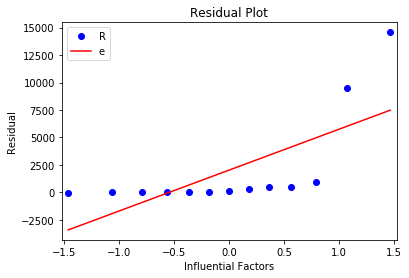

The mean of the residuals is 2.023e+03


In [70]:
import pylab

# check for the normality of the residuals
sm.qqplot(results_regression.resid, line='r')
plt.xlabel('Influential Factors')
plt.ylabel ('Residual')
plt.title ('Residual Plot')
plt.legend ('Residual Plot')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(results_regression.resid)/ len(results_regression.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

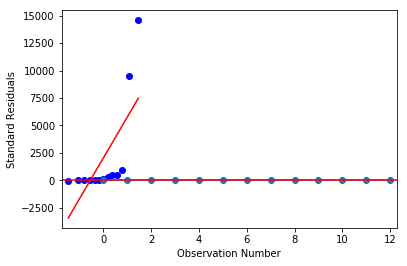

In [71]:
fig1 = sm.qqplot(results_regression.resid, line='r')

stdresid = pd.DataFrame(results_regression.resid_pearson)
fig2 = plt.plot(stdresid, 'o', ls = None)
l = plt.axhline(y = 0, color = 'r')
plt.xlabel('Observation Number')
plt.ylabel('Standard Residuals')
print(fig2)

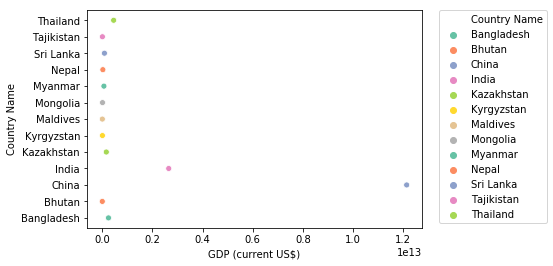

In [42]:
# plot 'Current GDP'
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="GDP (current US$)", y="Country Name",hue = "Country Name",
                     palette="Set2",
                     data=central_asia2)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('GDP by countries.png',  pad_inches = 'scalar')

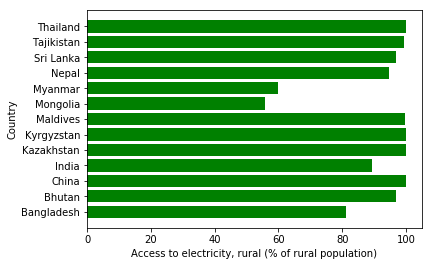

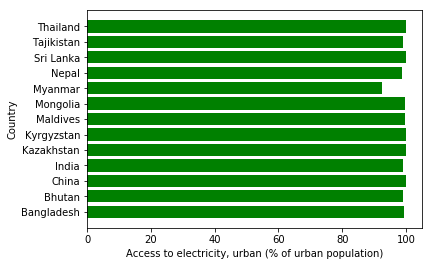

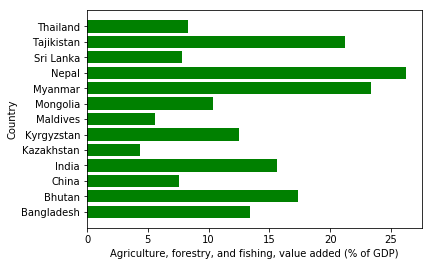

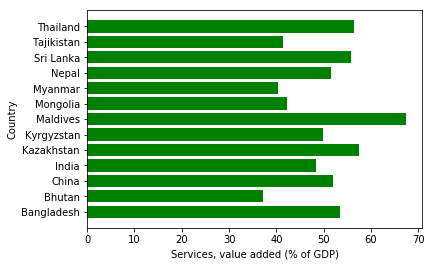

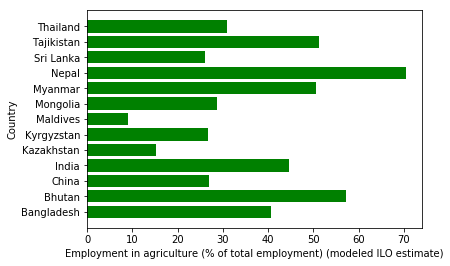

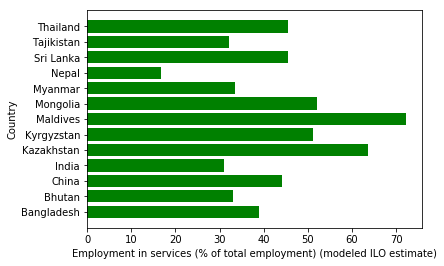

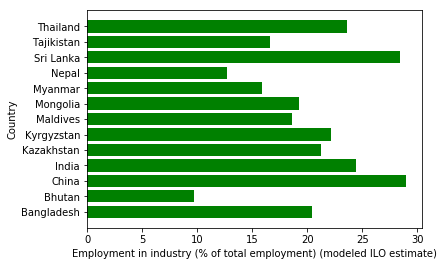

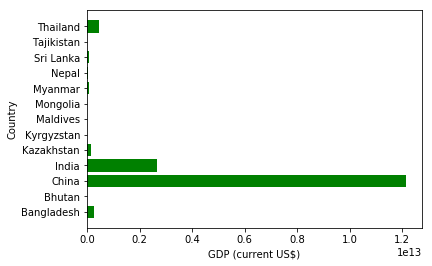

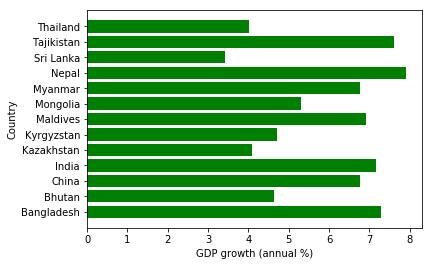

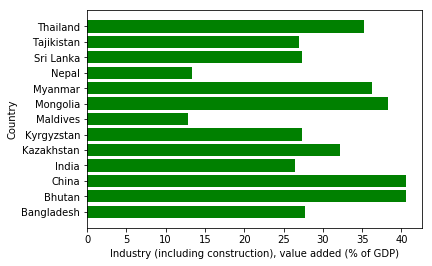

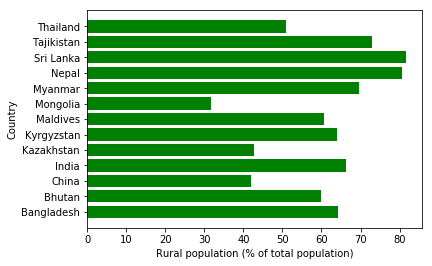

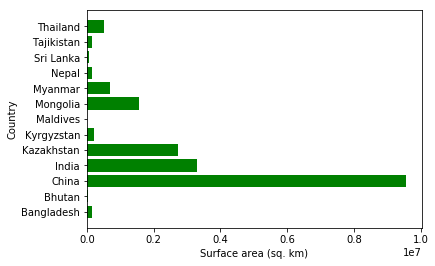

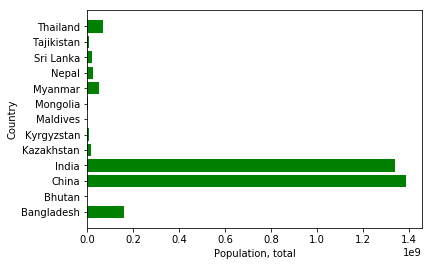

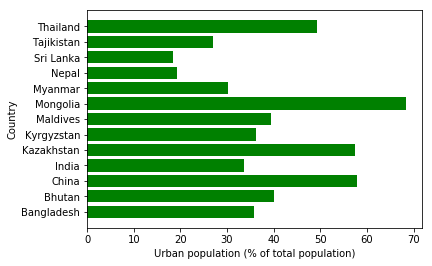

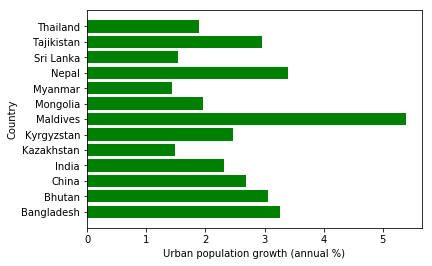

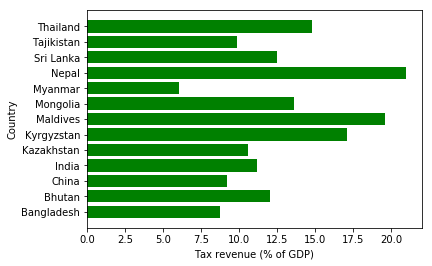

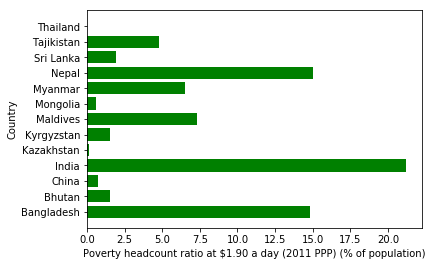

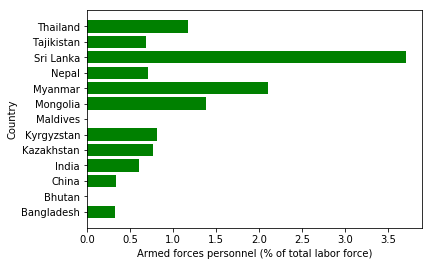

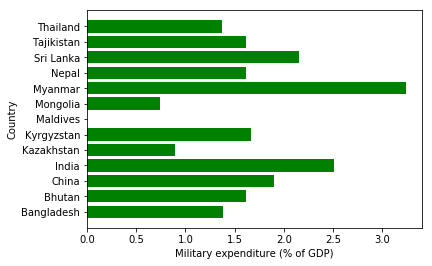

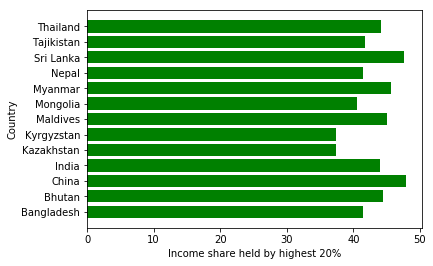

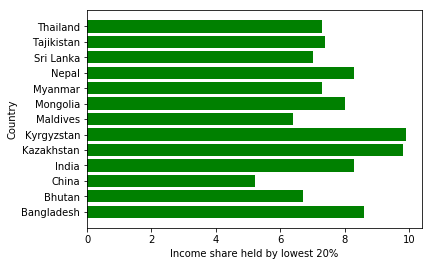

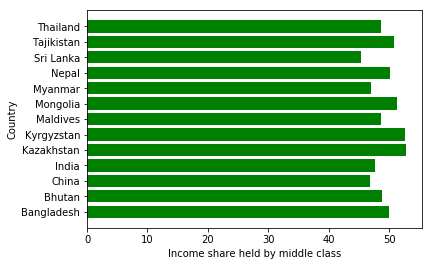

In [43]:
# plot bar graphes of each variable

########################1

plt.barh(central_asia2['Country Name'],
         central_asia2['Access to electricity, rural (% of rural population)'],
         color = 'Green')
#plt.title('Access to electricity, rural (% of rural population)')
plt.xlabel('Access to electricity, rural (% of rural population)')
plt.ylabel('Country')
plt.show()


########################2

plt.barh(central_asia2['Country Name'],
         central_asia2['Access to electricity, urban (% of urban population)'],
         color = 'Green')
#plt.title('Percentage of Employment in Agriculture by Country')
plt.xlabel('Access to electricity, urban (% of urban population)')
plt.ylabel('Country')
plt.show()


########################3


plt.barh(central_asia2['Country Name'],
         central_asia2["Agriculture, forestry, and fishing, value added (% of GDP)"],
         color = 'Green')
#plt.title('Percentage of Employment in Agriculture by Country')
plt.xlabel('Agriculture, forestry, and fishing, value added (% of GDP)')
plt.ylabel('Country')
plt.show()



########################4


plt.barh(central_asia2['Country Name'],
         central_asia2['Services, value added (% of GDP)'],
         color = 'Green')
#plt.title('Percentage of Employment in Agriculture by Country')
plt.xlabel('Services, value added (% of GDP)')
plt.ylabel('Country')
plt.show()


########################5



plt.barh(central_asia2['Country Name'],
         central_asia2['Employment in agriculture (% of total employment) (modeled ILO estimate)'],
         color = 'Green')
#plt.title('Access to electricity, rural (% of rural population)')
plt.xlabel('Employment in agriculture (% of total employment) (modeled ILO estimate)')
plt.ylabel('Country')
plt.show()


########################6

plt.barh(central_asia2['Country Name'],
         central_asia2['Employment in services (% of total employment) (modeled ILO estimate)'],
         color = 'Green')
#plt.title('Percentage of Employment in Agriculture by Country')
plt.xlabel('Employment in services (% of total employment) (modeled ILO estimate)')
plt.ylabel('Country')
plt.show()


########################7

plt.barh(central_asia2['Country Name'],
         central_asia2["Employment in industry (% of total employment) (modeled ILO estimate)"],
         color = 'Green')
#plt.title('Percentage of Employment in Agriculture by Country')
plt.xlabel('Employment in industry (% of total employment) (modeled ILO estimate)')
plt.ylabel('Country')
plt.show()


########################8


plt.barh(central_asia2['Country Name'],
         central_asia2['GDP (current US$)'],
         color = 'Green')
#plt.title('Percentage of Employment in Agriculture by Country')
plt.xlabel('GDP (current US$)')
plt.ylabel('Country')
plt.show()


########################9

plt.barh(central_asia2['Country Name'],
         central_asia2['GDP growth (annual %)'],
         color = 'Green')
#plt.title('Access to electricity, rural (% of rural population)')
plt.xlabel('GDP growth (annual %)')
plt.ylabel('Country')
plt.show()


########################10


plt.barh(central_asia2['Country Name'],
         central_asia2['Industry (including construction), value added (% of GDP)'],
         color = 'Green')
#plt.title('Percentage of Employment in Agriculture by Country')
plt.xlabel('Industry (including construction), value added (% of GDP)')
plt.ylabel('Country')
plt.show()


########################11


plt.barh(central_asia2['Country Name'],
         central_asia2["Rural population (% of total population)"],
         color = 'Green')
#plt.title('Percentage of Employment in Agriculture by Country')
plt.xlabel('Rural population (% of total population)')
plt.ylabel('Country')
plt.show()



########################12


plt.barh(central_asia2['Country Name'],
         central_asia2['Surface area (sq. km)'],
         color = 'Green')
#plt.title('Percentage of Employment in Agriculture by Country')
plt.xlabel('Surface area (sq. km)')
plt.ylabel('Country')
plt.show()


########################13

# Adding subplots

plt.barh(central_asia2['Country Name'],
         central_asia2['Population, total'],
         color = 'Green')
#plt.title('Access to electricity, rural (% of rural population)')
plt.xlabel('Population, total')
plt.ylabel('Country')
plt.show()


########################14

plt.barh(central_asia2['Country Name'],
         central_asia2['Urban population (% of total population)'],
         color = 'Green')
#plt.title('Percentage of Employment in Agriculture by Country')
plt.xlabel('Urban population (% of total population)')
plt.ylabel('Country')
plt.show()


########################15

plt.barh(central_asia2['Country Name'],
         central_asia2["Urban population growth (annual %)"],
         color = 'Green')
#plt.title('Percentage of Employment in Agriculture by Country')
plt.xlabel('Urban population growth (annual %)')
plt.ylabel('Country')
plt.show()


########################16


plt.barh(central_asia2['Country Name'],
         central_asia2['Tax revenue (% of GDP)'],
         color = 'Green')
#plt.title('Percentage of Employment in Agriculture by Country')
plt.xlabel('Tax revenue (% of GDP)')
plt.ylabel('Country')
plt.show()

########################17

plt.barh(central_asia2['Country Name'],
         central_asia2['Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)'],
         color = 'Green')
#plt.title('Percentage of Employment in Agriculture by Country')
plt.xlabel('Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)')
plt.ylabel('Country')
plt.show()


########################18

plt.barh(central_asia2['Country Name'],
         central_asia2["Armed forces personnel (% of total labor force)"],
         color = 'Green')
#plt.title('Percentage of Employment in Agriculture by Country')
plt.xlabel('Armed forces personnel (% of total labor force)')
plt.ylabel('Country')
plt.show()


########################19


plt.barh(central_asia2['Country Name'],
         central_asia2['Military expenditure (% of GDP)'],
         color = 'Green')
#plt.title('Percentage of Employment in Agriculture by Country')
plt.xlabel('Military expenditure (% of GDP)')
plt.ylabel('Country')
plt.show()


########################20


plt.barh(central_asia2['Country Name'],
         central_asia2['Income share held by highest 20%'],
         color = 'Green')
#plt.title('Percentage of Employment in Agriculture by Country')
plt.xlabel('Income share held by highest 20%')
plt.ylabel('Country')
plt.show()

########################21


plt.barh(central_asia2['Country Name'],
         central_asia2['Income share held by lowest 20%'],
         color = 'Green')
#plt.title('Percentage of Employment in Agriculture by Country')
plt.xlabel('Income share held by lowest 20%')
plt.ylabel('Country')
plt.show()


########################21


plt.barh(central_asia2['Country Name'],
         central_asia2['Income share held by middle class'],
         color = 'Green')
#plt.title('Percentage of Employment in Agriculture by Country')
plt.xlabel('Income share held by middle class')
plt.ylabel('Country')
plt.show()


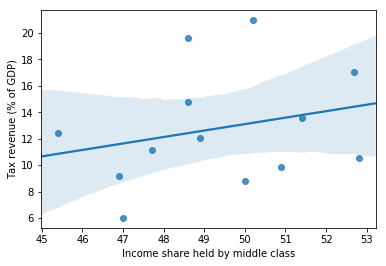

In [44]:
sns.regplot(x = central_asia2.loc[:,"Income share held by middle class"],
            y = central_asia2.loc[:,"Tax revenue (% of GDP)"])

In [45]:
# Creating a dictionary that includes the average of the region:
average_sector = {'Sectors': ['Agriculture', 'Industry', 'Services'],
                  'Averages': [13.35, 29.63, 50.27],
                  'Colors': ['green', 'orange', 'steelblue']}
df_average_sector = pd.DataFrame(average_sector)
df_average_sector


,Sectors,Averages,Colors
0,Agriculture,13.35,green
1,Industry,29.63,orange
2,Services,50.27,steelblue


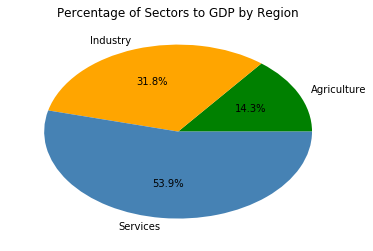

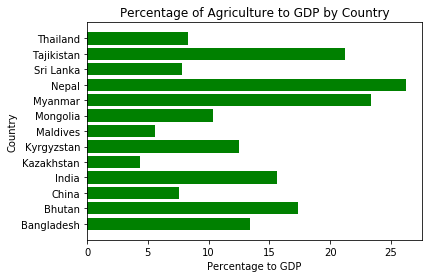

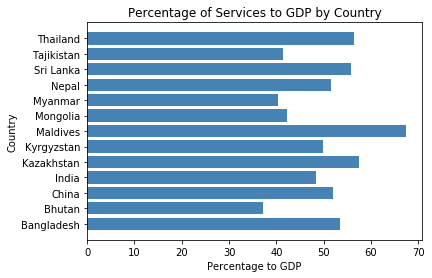

In [46]:
# Making the pie graph of the proportions of sectors to GDP in the Region:
plt.pie(df_average_sector['Averages'],
        labels  = df_average_sector['Sectors'],
        colors  = df_average_sector['Colors'],
        autopct = '%1.1f%%')
plt.title('Percentage of Sectors to GDP by Region')
plt.show()

### Agriculture ### Bar-graphing the countries % to GDP per sector:

plt.barh(central_asia2['Country Name'],
         central_asia2['Agriculture, forestry, and fishing, value added (% of GDP)'],
         color = 'Green')
plt.title('Percentage of Agriculture to GDP by Country')
plt.xlabel('Percentage to GDP')
plt.ylabel('Country')
plt.show()

### Employees Industry ### Bar-graphing the countries % to GDP per sector:

"""

plt.barh(central_asia2['Country Name'],
         central_asia2["Industry (including construction), value added (% of GDP)"],
         color = 'Orange')
plt.title('Percentage of Industry to GDP by Country')
plt.xlabel('Percentage to GDP')
plt.ylabel('Country')
plt.show()

"""

### Employees Services ### Bar-graphing the countries % to GDP per sector:

plt.barh(central_asia2['Country Name'],
         central_asia2['Services, value added (% of GDP)'],
         color = 'Steelblue')
plt.title('Percentage of Services to GDP by Country')
plt.xlabel('Percentage to GDP')
plt.ylabel('Country')
plt.show()


In [47]:
## Employees per sector:

average_employees = {'Sectors': ['Agriculture', 'Industry', 'Services'],
                  'Averages': [36.79, 20.17, 43.04],
                  'Colors': ['green', 'orange', 'steelblue']}
df_average_employees = pd.DataFrame(average_employees)
df_average_employees


,Sectors,Averages,Colors
0,Agriculture,36.79,green
1,Industry,20.17,orange
2,Services,43.04,steelblue


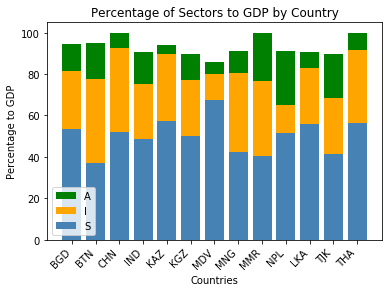

In [48]:
# Making a concatenated barchart of sectors per country:

countries = ['BGD', 'BTN', 'CHN', 'IND', 'KAZ', 'KGZ', 'MDV', 'MNG', 'MMR', 'NPL', 'LKA', 'TJK', 'THA']
agriculture = np.array([13.4, 17.4, 7.6, 15.6, 4.4, 12.5, 5.6, 10.3, 23.3, 26.2, 7.8, 21.2, 8.3])
industry = np.array([27.8, 40.6, 40.5, 26.5, 32.3, 27.3, 12.8, 38.3, 36.3, 13.4, 27.3, 27.0, 35.3])
services = np.array([53.5, 37.2, 51.9, 48.5, 57.4, 49.9, 67.4, 42.3, 40.4, 51.6, 55.7, 41.4, 56.4])
x = [x for x, _ in enumerate(countries)]


plt.bar(x, agriculture, color = 'Green', bottom =industry + services)
plt.bar(x, industry, color = 'Orange', bottom = services)
plt.bar(x, services, color = 'Steelblue')

plt.xticks(x, countries)
plt.ylabel("Percentage to GDP")
plt.xlabel("Countries")
plt.title('Percentage of Sectors to GDP by Country')
plt.legend('AIS')
plt.ylim=1.0

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()



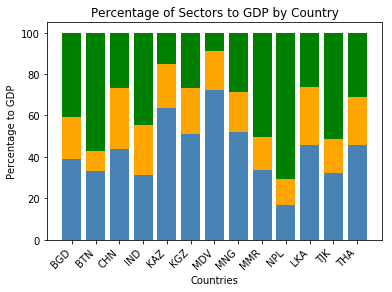

In [49]:
# Making a concatenated barchart of Employees by Sectors per country:

countries = ['BGD', 'BTN', 'CHN', 'IND', 'KAZ', 'KGZ', 'MDV', 'MNG', 'MMR', 'NPL', 'LKA', 'TJK', 'THA']
employment_agriculture = np.array([40.6, 57.2, 27.0, 44.5, 15.1, 26.6, 9.1, 28.8, 50.6, 70.4, 26.1, 51.3, 30.9])
employment_industry = np.array([20.4, 9.8, 29.0, 24.5, 21.3, 22.1, 18.7, 19.2, 15.9, 12.7, 28.4, 16.6, 23.6])
employment_services = np.array([39.0, 33.0, 44.0, 31.0, 63.6, 51.2, 72.2, 52.0, 33.5, 16.8, 45.5, 32.1, 45.5])
x = [x for x, _ in enumerate(countries)]

plt.bar(x, employment_agriculture, color = 'Green', bottom = employment_industry + employment_services)
plt.bar(x, employment_industry, color = 'Orange', bottom = employment_services)
plt.bar(x, employment_services, color = 'Steelblue')

plt.xticks(x, countries)
plt.ylabel("Percentage to GDP")
plt.xlabel("Countries")
plt.title('Percentage of Sectors to GDP by Country')
plt.ylim=1.0

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()


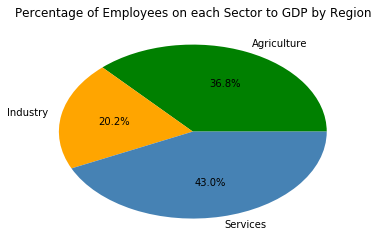

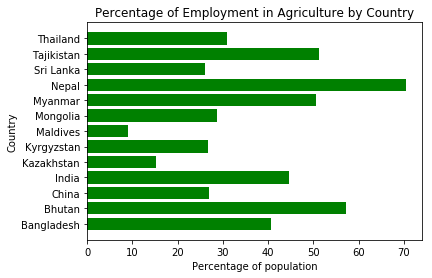

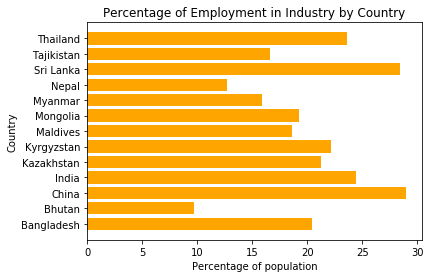

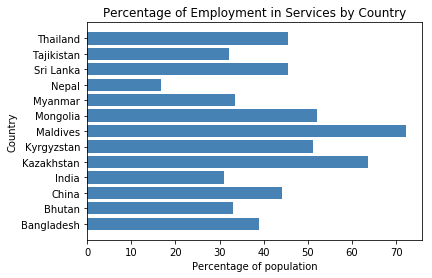

In [50]:
# Making the pie graph of the proportions of sectors to GDP in the Region:
plt.pie(df_average_employees['Averages'],
        labels  = df_average_employees['Sectors'],
        colors  = df_average_employees['Colors'],
        autopct = '%1.1f%%')
plt.title('Percentage of Employees on each Sector to GDP by Region')
plt.show()

### Employees Agriculture ### Bar-graphing the countries % to GDP per sector:

plt.barh(central_asia2['Country Name'],
         central_asia2['Employment in agriculture (% of total employment) (modeled ILO estimate)'],
         color = 'Green')
plt.title('Percentage of Employment in Agriculture by Country')
plt.xlabel('Percentage of population')
plt.ylabel('Country')
plt.show()

### Employees Industry ### Bar-graphing the countries % to GDP per sector:

plt.barh(central_asia2['Country Name'],
         central_asia2['Employment in industry (% of total employment) (modeled ILO estimate)'],
         color = 'Orange')
plt.title('Percentage of Employment in Industry by Country')
plt.xlabel('Percentage of population')
plt.ylabel('Country')
plt.show()

### Employees Services ### Bar-graphing the countries % to GDP per sector:

plt.barh(central_asia2['Country Name'],
         central_asia2['Employment in services (% of total employment) (modeled ILO estimate)'],
         color = 'Steelblue')
plt.title('Percentage of Employment in Services by Country')
plt.xlabel('Percentage of population')
plt.ylabel('Country')
plt.show()


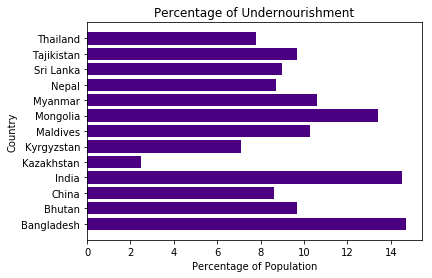

In [25]:
### Prevalence of undernourishment (% of population) ###
plt.barh(central_asia2['Country Name'],
         central_asia2['Prevalence of undernourishment (% of population)'],
         color = 'Indigo')
plt.title('Percentage of Undernourishment')
plt.xlabel('Percentage of Population')
plt.ylabel('Country')
plt.show()


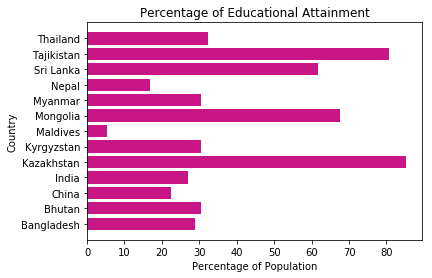

In [24]:
### Basic Educational Attainment (% of population) ###

plt.barh(central_asia2['Country Name'],
         central_asia2['Basic Educational Attainment (% of population)'],
         color = 'Mediumvioletred')
plt.title('Percentage of Educational Attainment')
plt.xlabel('Percentage of Population')
plt.ylabel('Country')
plt.show()